# Data Preparation for classifying news categories with a Convolutional Neural Network (NEW)

In [11]:
import collections
import numpy as np
import pandas as pd
import re

from argparse import Namespace
from matplotlib import pyplot as plt

In [12]:
args = Namespace(
    raw_dataset_csv_1="../data/original/ag_news_train.csv",
    raw_dataset_csv_2="../data/original/ag_news_test.csv",
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion=0.15,
    output_munged_csv="../data/processed/News_Category_Dataset_with_splits.csv",
    seed=1337
)

In [13]:
# Read raw data
news_1 = pd.read_csv(args.raw_dataset_csv_1, header=0)
news_1 = news_1.sample(5000)
news_2 = pd.read_csv(args.raw_dataset_csv_2, header=0)
news = pd.merge(news_1, news_2, how="outer")
news["text"] = news["Title"] + ". " + news["Description"]
news.rename(columns={"Class Index":"category"}, inplace=True)
news.drop(axis=1, columns=["Title", "Description"], inplace=True)
news

,category,text
0,1,"Powell presses China on NKorea, Taiwan talks. ..."
1,1,Russian Troops Fled from Siege School Claim Lo...
2,3,UK central bank leaves rates in place. The Ban...
3,1,German Institutes Forecast Growth Will Slow in...
4,1,Cubans queue to ditch US dollars. Long queues ...
...,...,...
12595,1,Around the world. Ukrainian presidential candi...
12596,2,Void is filled with Clement. With the supply o...
12597,2,Martinez leaves bitter. Like Roger Clemens did...
12598,3,5 of arthritis patients in Singapore take Bext...


In [14]:
# Splitting train by category
# Create dict
label_dict = {1:"World", 2:"Sports", 3:"Business", 4:"Sci/Tech"}
by_label = collections.defaultdict(list)
for _, row in news.iterrows():
    row.category = label_dict[row.category]
    by_label[row.category].append(row.to_dict())

In [15]:
# Create split data
final_list = []
np.random.seed(args.seed)
for _, item_list in sorted(by_label.items()):
    np.random.shuffle(item_list)
    n = len(item_list)
    n_train = int(args.train_proportion*n)
    n_val = int(args.val_proportion*n)
    n_test = int(args.test_proportion*n)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
    for item in item_list[n_train+n_val:]:
        item['split'] = 'test'  
    
    # Add to final list
    final_list.extend(item_list)

In [16]:
# Write split data to file
final_news = pd.DataFrame(final_list)

In [17]:
final_news.split.value_counts()

split
train    8818
test     1894
val      1888
Name: count, dtype: int64

In [18]:
final_news.head()

,category,text,split
0,Business,Kroger's Profit Up; Price Cuts Weigh. NEW YOR...,train
1,Business,Goldman Sachs Enters Fray for Takefuji. Goldma...,train
2,Business,Finance: Losing the Right to Sue. WASHINGTON ...,train
3,Business,"Aussies battle EU over cheese, champagne. AP -...",train
4,Business,EU foreign ministers hope to break deadlock ov...,train


In [19]:
# Write munged data to CSV
final_news.to_csv(args.output_munged_csv, index=False)

,category,text,split,length
0,Business,Kroger's Profit Up; Price Cuts Weigh. NEW YOR...,train,268
1,Business,Goldman Sachs Enters Fray for Takefuji. Goldma...,train,183
2,Business,Finance: Losing the Right to Sue. WASHINGTON ...,train,312
3,Business,"Aussies battle EU over cheese, champagne. AP -...",train,293
4,Business,EU foreign ministers hope to break deadlock ov...,train,269
...,...,...,...,...
12595,World,Israel continues northern Gaza offensive; six ...,test,293
12596,World,Mich. Elephant Gets Therapy for Arthritis. ROY...,test,157
12597,World,Australian train crash injures scores. A high-...,test,197
12598,World,Dutch mulling limits on freedom of expression....,test,193


<function matplotlib.pyplot.show(close=None, block=None)>

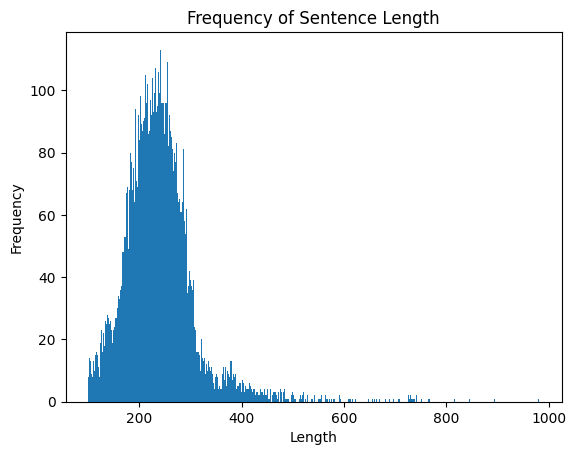

In [20]:
final_news['length'] = final_news['text'].apply(lambda x: len(x))
len_train = final_news.groupby('length').count()

sent_length = len_train.index.tolist()
sent_freq = len_train['text'].tolist()
display(final_news)
# 绘制句子长度及出现频数统计图
plt.bar(sent_length, sent_freq,2)
plt.title("Frequency of Sentence Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show